In [42]:
import pandas as pd
# from powerbiclient import Report, models
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind


In [56]:
url = 'Q:\Operations\Industrial Engineering\Projects\Water Meter\Kill Daily Water Usage (Cubic Meters).csv'
file = 'Kill Daily Water Usage (Cubic Meters).csv'

df = pd.read_csv(url)
df

,Date,Average Daily Usage,TimeLine
0,8/2/2022 0:00,988,No Smart Valve
1,8/3/2022 0:00,1013,No Smart Valve
2,8/4/2022 0:00,1023,No Smart Valve
3,8/5/2022 0:00,1025,No Smart Valve
4,8/8/2022 0:00,985,No Smart Valve
...,...,...,...
173,4/13/2023 0:00,940,Smart Valve
174,4/14/2023 0:00,914,Smart Valve
175,4/17/2023 0:00,918,Smart Valve
176,4/18/2023 0:00,938,Smart Valve


In [57]:
df.groupby('TimeLine', axis = 0).agg({'mean', 'count'})

C:\Users\msmetanin\AppData\Local\Temp\ipykernel_16220\1998012029.py:1: FutureWarning: ['Date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('TimeLine', axis = 0).agg({'mean', 'count'})


Average Daily Usage            
                             count        mean
TimeLine                                      
No Smart Valve                  78  932.358974
Smart Valve                    100  899.320000

In [65]:
df.groupby('TimeLine', axis = 0).describe()

Average Daily Usage                                        \
                             count        mean        std    min     25%   
TimeLine                                                                   
No Smart Valve                78.0  932.358974  87.512667  696.0  884.75   
Smart Valve                  100.0  899.320000  47.180907  773.0  869.75   

                                      
                  50%    75%     max  
TimeLine                              
No Smart Valve  915.5  972.0  1283.0  
Smart Valve     902.5  931.0  1008.0

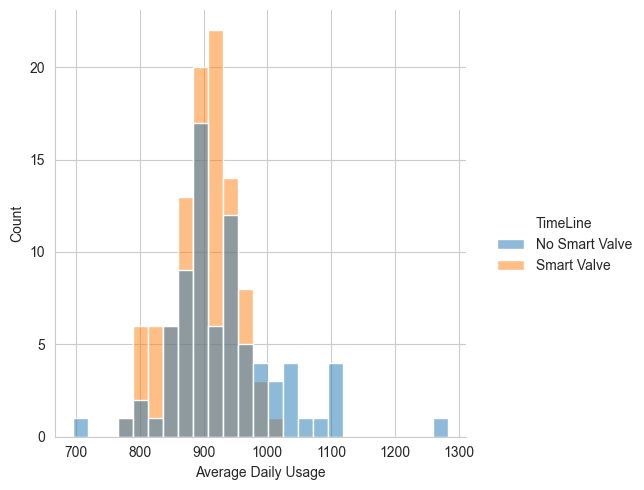

In [58]:
sns.displot(df, x = 'Average Daily Usage',  hue = 'TimeLine', )
plt.show();

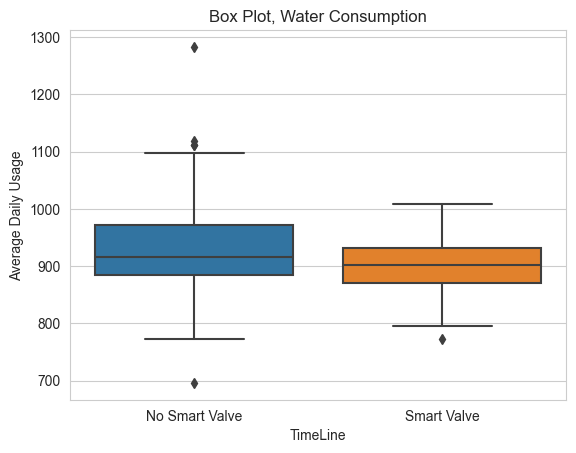

In [80]:
sns.boxplot(x = 'TimeLine', y = 'Average Daily Usage', data = df)
plt.title("Box Plot, Water Consumption")
plt.show();

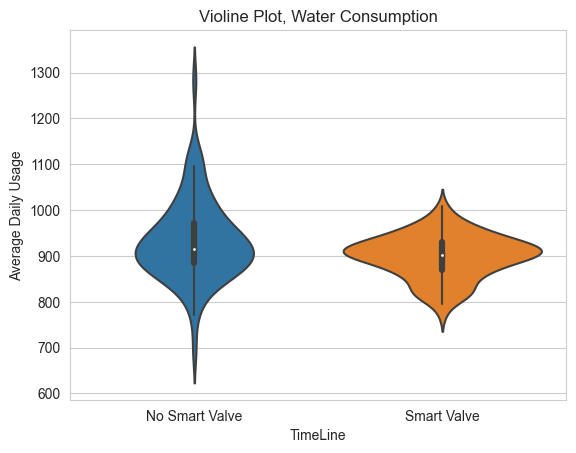

In [79]:
sns.violinplot(x = 'TimeLine', y = 'Average Daily Usage', data = df)
plt.title("Violine Plot, Water Consumption")
plt.show();

## TTEST

In [28]:
rng = np.random.default_rng()
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
stats.ttest_ind(rvs1, rvs2)
stats.ttest_ind(rvs1, rvs2, equal_var=False)

Ttest_indResult(statistic=0.022037933076805908, pvalue=0.9824221019168728)

In [74]:
from statsmodels.stats.weightstats import ttest_ind

ttest_ind(no_smart_valve, smart_valve)

(3.2237125803766618, 0.001508205520410917, 176.0)

In [72]:
no_smart_valve = df[df['TimeLine'] == 'No Smart Valve']['Average Daily Usage']
smart_valve = df[df['TimeLine'] == 'Smart Valve']['Average Daily Usage']

ttest_ind(no_smart_valve, smart_valve, equal_var=True)



Ttest_indResult(statistic=3.2237125803766618, pvalue=0.001508205520410917)

In [71]:
stats.shapiro(no_smart_valve)

stats.levene(no_smart_valve, smart_valve)

LeveneResult(statistic=13.680920214248294, pvalue=0.00028935211812351904)

In [63]:
smart_valve['Average Daily Usage']

78     902
79     830
80     902
81     891
82     908
      ... 
173    940
174    914
175    918
176    938
177    960
Name: Average Daily Usage, Length: 100, dtype: int64

In [1]:
import adal
import requests
import json

# Set up the authentication context
authority_url = 'https://login.microsoftonline.com/common'
resource_url = 'https://analysis.windows.net/powerbi/api'
client_id = 'b9b8e5dd-d958-477a-81c6-27b3d2d4a3e9'
client_secret = '3a1e0ca1-5265-4b3f-a8c6-f7cc03f6b2dc'
context = adal.AuthenticationContext(authority_url)
token = context.acquire_token_with_client_credentials(resource_url, client_id, client_secret)

# Set up the API endpoint and query parameters
api_url = 'https://app.powerbi.com/datahub/datasets/7b986a7e-0620-4a93-a98f-3ee5098bdef4'
headers = {
    'Authorization': 'Bearer ' + token['accessToken'],
    'Content-Type': 'application/json'
}
params = {
    '$select': 'column1,column2,column3',
    '$top': 100
}

# Send the HTTP request and process the response
response = requests.get(api_url, headers=headers, params=params)
if response.status_code == 200:
    data = json.loads(response.content)
    # Do something with the data
else:
    print('Error: ' + str(response.status_code))


AdalError: Get Token request returned http error: 400 and server response: {"error":"unauthorized_client","error_description":"AADSTS700016: Application with identifier 'b9b8e5dd-d958-477a-81c6-27b3d2d4a3e9' was not found in the directory 'Microsoft Services'. This can happen if the application has not been installed by the administrator of the tenant or consented to by any user in the tenant. You may have sent your authentication request to the wrong tenant.\r\nTrace ID: 16cc4bcc-8877-467b-a4e2-a44e49122500\r\nCorrelation ID: 7b3dc4a5-dfb6-46f8-8cbd-1a740ec9bd2e\r\nTimestamp: 2023-04-21 00:27:52Z","error_codes":[700016],"timestamp":"2023-04-21 00:27:52Z","trace_id":"16cc4bcc-8877-467b-a4e2-a44e49122500","correlation_id":"7b3dc4a5-dfb6-46f8-8cbd-1a740ec9bd2e","error_uri":"https://login.microsoftonline.com/error?code=700016"}

In [6]:
import pyodbc as odbc
import pandas as pd
server = 'cmpcsb01'
database = 'packagingplanner'
username = 'remotequery'
password = "excel"
cnxn = odbc.connect('DRIVER={SQL Server}; SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password,
                    trusted_connection='no'
                    )
cursor = cnxn.cursor()
print(cursor)

query = '''SELECT *
FROM     vwPrepForCutInputPriorities
where productiondate= ?
--GROUP BY MeatItem
'''
meat = pd.read_sql(query, cnxn,
                   params=['20220419']
                )

meat

C:\Users\msmetanin\AppData\Local\Temp\ipykernel_17536\1652875520.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  meat = pd.read_sql(query, cnxn,


,MeatItem,ItemKey,P1,P2,P3,P4,ProductionDate
